# CIFAR-10 dataset processing


[Link to the dataset](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot
from torch.utils.data import Dataset

### Reading data

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

In [3]:
batch_test = unpickle('cifar-10-python\\cifar-10-batches-py\\test_batch')
batch_test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
def reshape_image(array: np.ndarray) -> np.ndarray:
    array = array.reshape(3, 32, 32).transpose([1, 2, 0])
    return array

def reshape_batch(array: np.ndarray) -> np.ndarray:
    array = array.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    return array

def show_image(array: np.ndarray) -> None:
    pyplot.imshow(array)
    pyplot.show()

### Dataset image example

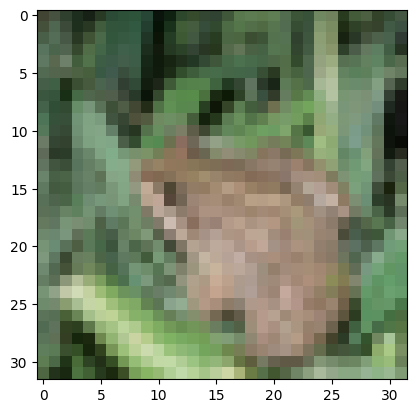

In [5]:
image = batch_test[b'data'][4]
image = reshape_image(image)
show_image(image)

### Dataset preprocessing


In [6]:
dataset_meta = unpickle('cifar-10-python\\cifar-10-batches-py\\batches.meta')
dataset_meta.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [7]:
dataset_meta[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [8]:
batch_1 = unpickle('cifar-10-python\\cifar-10-batches-py\\data_batch_1')
batch_2 = unpickle('cifar-10-python\\cifar-10-batches-py\\data_batch_2')
batch_3 = unpickle('cifar-10-python\\cifar-10-batches-py\\data_batch_3')
batch_4 = unpickle('cifar-10-python\\cifar-10-batches-py\\data_batch_4')
batch_5 = unpickle('cifar-10-python\\cifar-10-batches-py\\data_batch_5')

batch_1[b'data'] = reshape_batch(batch_1[b'data'])
batch_2[b'data'] = reshape_batch(batch_2[b'data'])
batch_3[b'data'] = reshape_batch(batch_3[b'data'])
batch_4[b'data'] = reshape_batch(batch_4[b'data'])
batch_5[b'data'] = reshape_batch(batch_5[b'data'])

batch_test[b'data'] = reshape_batch(batch_test[b'data'])

In [13]:
class CifarDataset(Dataset):
    def __init__(self, batches: list[dict]):
        super().__init__()
        self.batches = batches
        self.batch_size = batches[0][b"data"].shape[0]

    def __len__(self):
        return self.batch_size * len(self.batches)

    def __getitem__(self, index):
        batch_index = index // self.batch_size
        item_index = index % self.batch_size
        image = self.batches[batch_index][b'data'][item_index]
        label = self.batches[batch_index][b'labels'][item_index]
        return image, label


train_dataset = CifarDataset(batches=[
    batch_1,
    batch_2,
    batch_3,
    batch_4,
    batch_5
])
test_dataset = CifarDataset(batches=[
    batch_test
])